In [320]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

In [283]:
df_infos_discentes = pd.read_csv('dados-pessoais-discentes.csv', sep=';')

In [259]:
cursos = ['ENGENHARIA CIVIL', 'ENGENHARIA QUÍMICA', 'ENGENHARIA ELÉTRICA', 'ENGENHARIA MECATRÔNICA', 'ENGENHARIA AMBIENTAL',
         'ENGENHARIA DE COMPUTAÇÃO', 'ENGENHARIA MECÂNICA', 'ENGENHARIA DE ALIMENTOS', 'ENGENHARIA TÊXTIL', 'ENGENHARIA DE PETRÓLEO', 'CIÊNCIA DA COMPUTAÇÃO', 
         'CIÊNCIAS E TECNOLOGIA', 'TECNOLOGIA DA INFORMAÇÃO', 'ENGENHARIA DE PRODUÇÃO', 'ENGENHARIA DE TELECOMUNICAÇÕES', 
         'ENGENHARIA BIOMEDICA']

In [284]:
#filtrando os cursos desejados
df_infos_discentes=df_infos_discentes[df_infos_discentes.curso.isin(cursos)]

In [208]:
df_infos_discentes

Index(['id_discente', 'sexo', 'ano_nascimento', 'raca', 'estado_origem',
       'cidade_origem', 'estado', 'municipio', 'bairro', 'nivel_ensino',
       'forma_ingresso', 'ano_ingresso', 'periodo_ingresso', 'cotista',
       'curso', 'tipo_cota', 'descricao_tipo_cota'],
      dtype='object')

In [285]:
#filtrando dados de 2006 pra frente
df_infos_discentes = df_infos_discentes[df_infos_discentes.ano_ingresso>=2006]

In [286]:
#filtrando dados nulos de ano de nascimento
df_infos_discentes = df_infos_discentes[~df_infos_discentes.ano_nascimento.isna()]

In [290]:
#excluindo valor de ano_ingressante muito difente
df_infos_discentes = df_infos_discentes[df_infos_discentes.id_discente!='3f5164bbb233309022051d0628ee14d1']

In [291]:
df_infos_discentes['ano_nascimento'] = df_infos_discentes['ano_nascimento'].astype(int)

In [292]:
# tratando os valores de ano de nascimento
df_infos_discentes['ano_nascimento'] = df_infos_discentes['ano_nascimento'].apply(lambda row: '19'+str(row) if row<100 else str(row))

In [293]:
df_infos_discentes['ano_nascimento'] = df_infos_discentes['ano_nascimento'].replace('199','1999')
df_infos_discentes['ano_nascimento'] = df_infos_discentes['ano_nascimento'].replace('994','1994')
df_infos_discentes['ano_nascimento'] = df_infos_discentes['ano_nascimento'].replace('1194','1994')

In [305]:
anos_nas = df_infos_discentes['ano_nascimento'].unique()

In [308]:
import numpy as np
np.sort(anos_nas)

array([1947, 1952, 1953, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962,
       1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006])

In [296]:
# transformando novamente para int 
df_infos_discentes['ano_nascimento'] = df_infos_discentes['ano_nascimento'].astype(int)
# calculando idade
df_infos_discentes['idade_quando_ingressou'] = df_infos_discentes.apply(lambda row: row.ano_ingresso - row.ano_nascimento, axis=1)

In [297]:
df_infos_discentes = df_infos_discentes[df_infos_discentes['sexo']!='false']

In [309]:
df_infos_discentes[df_infos_discentes.ano_nascimento==1947]

,id_discente,sexo,ano_nascimento,raca,estado_origem,cidade_origem,estado,municipio,bairro,nivel_ensino,forma_ingresso,ano_ingresso,periodo_ingresso,cotista,curso,tipo_cota,descricao_tipo_cota,idade_quando_ingressou
128258,358a88f4e04ba795c476d0b1fb400122,F,1947,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,BARRO VERMELHO,GRADUAÇÃO,VESTIBULAR,2009,2.0,f,ENGENHARIA DE ALIMENTOS,NaN,NaN,62


### GRAFICO VIOLINO DA IDADE

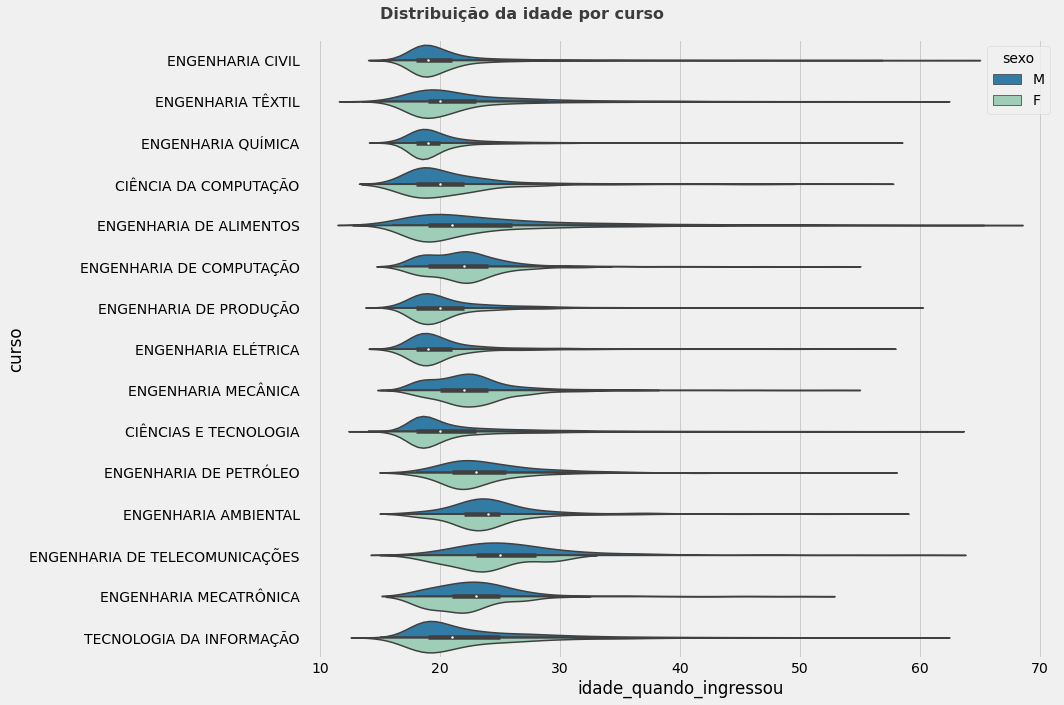

In [458]:
import matplotlib.pyplot as plt;
import matplotlib.collections
import seaborn as sns
import pandas as pd

style.use('fivethirtyeight')

plt.figure(figsize=(15,10))

sns.violinplot(data=df_infos_discentes[['sexo','curso','idade_quando_ingressou']], x='idade_quando_ingressou', y='curso', 
                    hue='sexo', split=True, inner='box', linewidth=1.5, palette='YlGnBu_r')
plt.text(x = 15, y = -1,
    s = '''Distribuição da idade por curso''',
               fontsize = 16, weight = 'bold', alpha = .75)
# plt.text(x = 10, y = 16,
#     s = '''©NISIAS NA STEAM: Analisando as percepções de genero nas exatas                                                             UFRN-2022''',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
# #rotate x-axis labels

plt.tight_layout()
plt.savefig('imagens/idade-curso-violino', format='png')

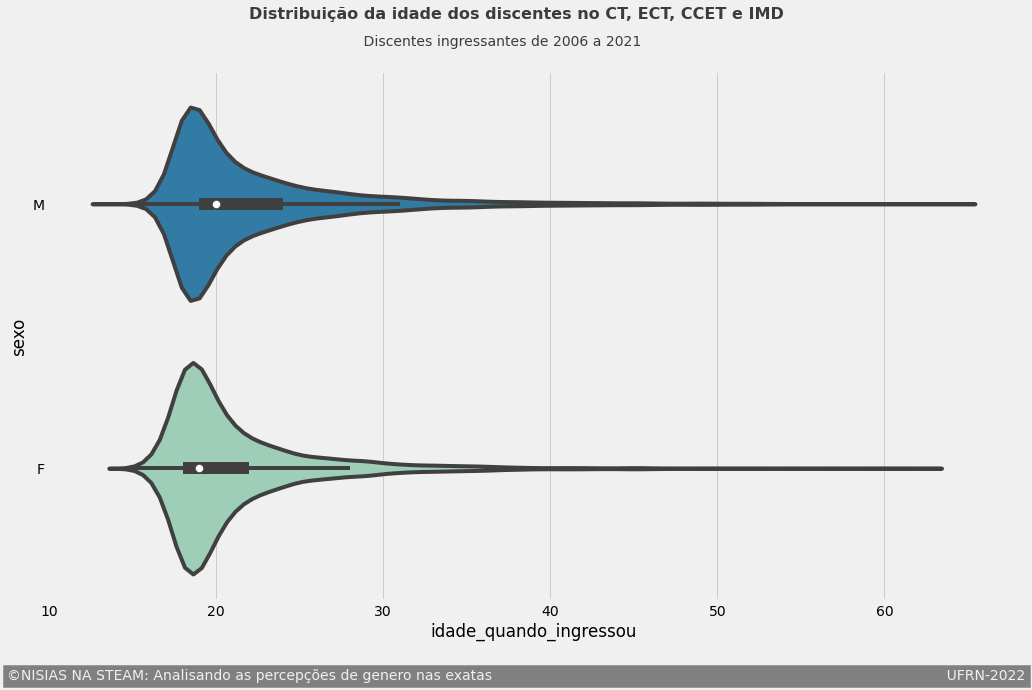

In [447]:
style.use('fivethirtyeight')

plt.figure(figsize=(15,10))

sns.violinplot(data=df_infos_discentes[['sexo','curso','idade_quando_ingressou']], x='idade_quando_ingressou', y='sexo'
               , split=True, inner='box', linewidth=4, palette='YlGnBu_r')
plt.text(x = 22, y = -0.7,
    s = '''Distribuição da idade dos discentes no CT, ECT, CCET e IMD''',
               fontsize = 16, weight = 'bold', alpha = .75)
plt.text(x = 28, y = -0.6,
    s = '''   Discentes ingressantes de 2006 a 2021''',
               fontsize = 14, alpha = .75)
plt.text(x = 7.5, y = 1.8,
    s = '''©NISIAS NA STEAM: Analisando as percepções de genero nas exatas                                                                                                     UFRN-2022''',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
#rotate x-axis labels

plt.tight_layout()
plt.savefig('imagens/idade-geral-violino', format='png')

In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 
'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 
'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr',
'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 
'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn',
'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 
'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r',
'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r',
'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 
'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r',
'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r',
'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r',
'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 
'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

palette="YlGnBu_r"

In [235]:
#calculando média de idade por curso dos discentes por sexo
df_idade_media_discentes = df_infos_discentes[['sexo','curso','idade_quando_ingressou',]].groupby(['curso','sexo']).agg(lambda i: sum(i)/len(list(i))).reset_index()

In [236]:
df_idade_media_discentes = df_idade_media_discentes[df_idade_media_discentes.sexo!='false']

In [246]:
df_infos_discentes

,id_discente,sexo,ano_nascimento,raca,estado_origem,cidade_origem,estado,municipio,bairro,nivel_ensino,forma_ingresso,ano_ingresso,periodo_ingresso,cotista,curso,tipo_cota,descricao_tipo_cota,idade_quando_ingressou
94292,5b3f4757a29f99834fd7d64ec6294359,M,1980,Branco,Rondônia,GUAJARÁ-MIRIM,Rio Grande do Norte,NATAL,PONTA NEGRA,GRADUAÇÃO,TRANSFERÊNCIA VOLUNTÁRIA,2006,1.0,f,ENGENHARIA CIVIL,NaN,NaN,26
94304,9c3049755df86970b6ea98a52d54c20d,F,1966,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,NEOPOLIS,GRADUAÇÃO,REINGRESSO DE GRADUADO,2006,1.0,f,ENGENHARIA TÊXTIL,NaN,NaN,40
94308,871a498ddd32d4950d9f5512c21e0ab1,F,1976,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,LAGOA NOVA,GRADUAÇÃO,REINGRESSO DE GRADUADO,2006,1.0,f,ENGENHARIA QUÍMICA,NaN,NaN,30
94345,d3829d082ee22214907a4cbe7060573b,F,1979,Branco,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,LAGOA NOVA,GRADUAÇÃO,REINGRESSO DE GRADUADO,2006,1.0,f,ENGENHARIA TÊXTIL,NaN,NaN,27
94356,ad15533eeafe8dd2fe52077e2c866fb1,M,1952,Pardo,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,PITIMBU,GRADUAÇÃO,REINGRESSO DE GRADUADO,2006,1.0,f,ENGENHARIA CIVIL,NaN,NaN,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451797,192a336d1c8bd1d8d342db9de57b227d,M,1981,Não Informado,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,C MACIO,GRADUAÇÃO,REINGRESSO DE GRADUADO,2010,1.0,f,ENGENHARIA DE PETRÓLEO,NaN,NaN,29
452672,c7f3cc8d29bda809430a07d6154c833b,M,1986,Branco,São Paulo,SÃO PAULO,Rio Grande do Norte,NATAL,CAPIM MACIO,GRADUAÇÃO,TRANSF. COMPULSORIA,2010,2.0,f,ENGENHARIA DE COMPUTAÇÃO,NaN,NaN,24
452743,5e389717e7a58fff64d3d4becc758c25,M,1989,Branco,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,CANDELÁRIA,GRADUAÇÃO,TRANSF. COMPULSORIA,2010,2.0,f,ENGENHARIA MECÂNICA,NaN,NaN,21
452745,1abbabcb96e26008b347f51740aeb010,M,1989,Branco,Rio Grande do Norte,NATAL,Rio Grande do Norte,NATAL,LAGOA NOVA,GRADUAÇÃO,TRANSFERÊNCIA VOLUNTÁRIA,2010,2.0,f,ENGENHARIA CIVIL,NaN,NaN,21


#### a média de idade das mulheres é menor q a dos homens. pode ser que mais homens façam uma segunda graduação, o q acaba elevando a média

In [237]:
df_idade_media_discentes

,curso,sexo,idade_quando_ingressou
0,CIÊNCIA DA COMPUTAÇÃO,F,20.935484
1,CIÊNCIA DA COMPUTAÇÃO,M,21.200000
2,CIÊNCIAS E TECNOLOGIA,F,20.990213
3,CIÊNCIAS E TECNOLOGIA,M,22.061277
5,ENGENHARIA AMBIENTAL,F,23.932039
6,ENGENHARIA AMBIENTAL,M,24.804965
7,ENGENHARIA CIVIL,F,20.246817
8,ENGENHARIA CIVIL,M,20.895607
9,ENGENHARIA DE ALIMENTOS,F,22.747630
10,ENGENHARIA DE ALIMENTOS,M,25.213687


In [137]:
df_infos_discentes[['sexo','curso','idade_quando_ingressou','forma_ingresso']]['forma_ingresso'].unique()

array(['TRANSFERÊNCIA VOLUNTÁRIA', 'REINGRESSO DE GRADUADO', 'VESTIBULAR',
       'CONVENIO PEC-G', 'REINGRESSO AUTOMATICO', 'TRANSF. COMPULSORIA',
       'JUDICIAL', 'REOPCAO', 'REMOCAO', 'SiSU',
       'REOCUPAÇÃO DE VAGAS RESIDUAIS', 'REINGRESSO SEGUNDO CICLO',
       'MOBILIDADE INTERNACIONAL - DUPLA TITULAÇÃO', 'ACORDO TIMOR-LESTE',
       'PROCESSO SELETIVO ESPECÍFICO'], dtype=object)

In [146]:
# df_infos_discentes[['sexo','forma_ingresso','idade_quando_ingressou']].groupby(['forma_ingresso','sexo']).agg(lambda i: sum(i)/len(list(i))).reset_index()
# quantidade de ingressantes de cada sexo por forma de ingresso
df_forma_ingresso_discentes = pd.crosstab(df_infos_discentes['forma_ingresso'], df_infos_discentes['sexo']).sort_values(by='F', ascending=False).reset_index()
df_forma_ingresso_discentes['percent_F'] = df_forma_ingresso_discentes.apply(lambda row: (row.F*100)/(row.F + row.M),axis=1)

In [147]:
df_forma_ingresso_discentes

sexo,forma_ingresso,F,M,false,percent_F
0,SiSU,9199,23833,2,27.848753
1,VESTIBULAR,2367,7016,3,25.226473
2,REOCUPAÇÃO DE VAGAS RESIDUAIS,706,1873,0,27.374952
3,REINGRESSO SEGUNDO CICLO,678,2097,1,24.432432
4,REINGRESSO DE GRADUADO,77,131,0,37.019231
5,TRANSF. COMPULSORIA,18,71,0,20.224719
6,TRANSFERÊNCIA VOLUNTÁRIA,18,73,0,19.780220
7,JUDICIAL,16,29,0,35.555556
8,CONVENIO PEC-G,10,29,0,25.641026
9,REOPCAO,10,25,0,28.571429


In [184]:
df_curso_forma_ingresso_discentes = df_infos_discentes[['sexo','curso','forma_ingresso']].groupby(
    ['curso','forma_ingresso']).agg(
    lambda i: (list(i))).reset_index()

In [193]:
df_curso_forma_ingresso_discentes['percent_F']=df_curso_forma_ingresso_discentes.sexo.apply(lambda row: (row.count('F')*100) / len(row))

In [201]:
df_curso_forma_ingresso_discentes[(df_curso_forma_ingresso_discentes.forma_ingresso=='REINGRESSO SEGUNDO CICLO') | 
                                  (df_curso_forma_ingresso_discentes.forma_ingresso=='SiSU') |
                                  (df_curso_forma_ingresso_discentes.forma_ingresso=='VESTIBULAR')]

,curso,forma_ingresso,sexo,percent_F
3,CIÊNCIA DA COMPUTAÇÃO,REINGRESSO SEGUNDO CICLO,"[M, M, F, M, M, M, M, F, M, M, M, M, M, M, M, ...",18.279570
6,CIÊNCIA DA COMPUTAÇÃO,SiSU,"[M, M, M, F, M, M, M, M, M, M, M, M, M, F, F, ...",19.298246
9,CIÊNCIA DA COMPUTAÇÃO,VESTIBULAR,"[M, M, M, M, M, M, M, M, M, M, M, M, M, M, M, ...",10.899183
15,CIÊNCIAS E TECNOLOGIA,SiSU,"[M, M, F, F, M, M, M, M, F, F, F, F, M, M, M, ...",25.808993
18,CIÊNCIAS E TECNOLOGIA,VESTIBULAR,"[M, M, M, M, F, M, M, M, M, F, F, M, F, F, F, ...",22.629715
21,ENGENHARIA AMBIENTAL,REINGRESSO SEGUNDO CICLO,"[F, F, M, F, F, F, M, F, M, M, F, M, F, M, F, ...",52.095808
22,ENGENHARIA AMBIENTAL,SiSU,"[F, F, M, F, F, F, F, F, M, F, M, M, M, F, M, ...",54.545455
30,ENGENHARIA CIVIL,SiSU,"[M, M, M, F, M, M, F, F, M, F, M, M, M, M, M, ...",33.138752
33,ENGENHARIA CIVIL,VESTIBULAR,"[M, M, F, M, M, M, M, M, M, F, M, M, M, M, F, ...",26.952141
38,ENGENHARIA DE ALIMENTOS,SiSU,"[F, M, M, M, F, M, M, M, F, M, M, M, F, F, M, ...",51.423786


#### para as engenharias por cet, caiu o percentual de mulheres quando comparado com a forma de ingresso SiSU

In [206]:
# filtrando raça diferente de null
df_raca_discentes = df_infos_discentes[~df_infos_discentes.raca.isna()]

In [211]:
pd.crosstab(df_raca_discentes['curso'], df_raca_discentes['raca']).reset_index()

raca,curso,Amarelo (de origem oriental),Branco,Cigano,Indígena,Negro,Não Informado,Pardo,Remanescente de quilombo
0,CIÊNCIA DA COMPUTAÇÃO,0,248,0,1,34,109,231,0
1,CIÊNCIAS E TECNOLOGIA,66,10005,1,34,1600,1630,12110,8
2,ENGENHARIA AMBIENTAL,2,270,0,1,28,29,261,0
3,ENGENHARIA CIVIL,0,1344,0,1,116,357,1502,0
4,ENGENHARIA DE ALIMENTOS,1,498,0,1,90,168,802,0
5,ENGENHARIA DE COMPUTAÇÃO,7,413,0,0,50,148,318,1
6,ENGENHARIA DE PETRÓLEO,0,204,0,0,31,58,133,1
7,ENGENHARIA DE PRODUÇÃO,8,1124,0,6,118,198,1107,0
8,ENGENHARIA DE TELECOMUNICAÇÕES,1,129,0,1,14,18,127,0
9,ENGENHARIA ELÉTRICA,4,1015,0,5,129,325,1272,0


In [219]:
pd.crosstab(df_raca_discentes['sexo'], df_raca_discentes['raca'], normalize='index').reset_index()

raca,sexo,Amarelo (de origem oriental),Branco,Cigano,Indígena,Negro,Não Informado,Pardo,Remanescente de quilombo
0,F,0.002593,0.403478,0.000000,0.001144,0.047822,0.070551,0.474182,0.000229
1,M,0.002128,0.394092,0.000028,0.001447,0.060900,0.083262,0.457886,0.000255
2,false,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.833333,0.000000


In [224]:
pd.crosstab(df_raca_discentes['estado_origem'],df_raca_discentes['sexo']).sort_values(by='F').reset_index()

sexo,estado_origem,F,M,false
0,Tocantins,5,18,0
1,Roraima,8,39,0
2,Mato Grosso do Sul,8,27,0
3,Acre,8,18,0
4,Amapá,9,26,0
5,Espírito Santo,11,15,0
6,Sergipe,14,30,0
7,Rondônia,15,60,0
8,Santa Catarina,18,35,0
9,Paraná,19,77,0


In [238]:
df_discentes=pd.DataFrame({})
for i in range(2006,2022):
    arq = 'discentes-{}.csv'.format(str(i))
    df_discentes = df_discentes.append(pd.read_csv(arq, sep=';'), ignore_index=True)

In [239]:
unidades = ['CENTRO DE TECNOLOGIA', 'ESCOLA DE CIÊNCIAS E TECNOLOGIA',
       'CENTRO DE CIÊNCIAS EXATAS E DA TERRA',
       'INSTITUTO METROPOLE DIGITAL']

In [240]:
df_discentes_unidade = df_discentes[df_discentes['nome_unidade'].isin(unidades)]

In [241]:
df_cursos = pd.read_csv('cursos-de-graduacao.csv', sep=';')

In [242]:
ids_cursos = df_cursos[df_cursos['nome'].isin(cursos)].id_curso

In [243]:
df_discentes_cursos = df_discentes[df_discentes['id_curso'].isin(ids_cursos)]

### Discentes de graduação

In [244]:
df_discentes_unidade_grad = df_discentes_unidade[df_discentes_unidade.nivel_ensino == 'GRADUAÇÃO']

In [245]:
df_discentes_unidade_grad

,matricula,ano_ingresso,periodo_ingresso,id_curso,id_unidade,id_unidade_gestora,nome_discente,sexo,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,nome_curso,modalidade_educacao,nome_unidade,nome_unidade_gestora
1,2.006245e+08,2006,1.0,111635050.0,439.0,439.0,ABIMAEL AMARO XAVIER BARBOSA,M,VESTIBULAR,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,FÍSICA,PRESENCIAL,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,CENTRO DE CIÊNCIAS EXATAS E DA TERRA
5,2.006184e+08,2006,1.0,2000025.0,445.0,445.0,ABRAAO CESARIO VIEIRA,M,VESTIBULAR,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,ENGENHARIA CIVIL,PRESENCIAL,CENTRO DE TECNOLOGIA,CENTRO DE TECNOLOGIA
7,2.006003e+08,2006,1.0,111635066.0,439.0,439.0,ABRAAO EDUARDO BRITO ROCHA DE AZEVEDO,M,REINGRESSO DE GRADUADO,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,MATEMÁTICA,PRESENCIAL,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,CENTRO DE CIÊNCIAS EXATAS E DA TERRA
9,2.006212e+08,2006,1.0,2000030.0,445.0,445.0,ABRAHAO DA SILVA FONTES,M,VESTIBULAR,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,ENGENHARIA ELÉTRICA,PRESENCIAL,CENTRO DE TECNOLOGIA,CENTRO DE TECNOLOGIA
13,2.006274e+08,2006,1.0,111635075.0,439.0,439.0,ACSA EMMANUELLE DE SOUZA HECKERT BASTOS,F,VESTIBULAR,REGULAR,CANCELADO,G,GRADUAÇÃO,QUÍMICA,PRESENCIAL,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,CENTRO DE CIÊNCIAS EXATAS E DA TERRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256245,2.021009e+10,2021,1.0,92127264.0,6069.0,605.0,YURI FÁBIO ALVES FERREIRA,M,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,INSTITUTO METROPOLE DIGITAL,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
256247,2.021001e+10,2021,2.0,10320810.0,4885.0,605.0,YURI FURTADO ELIOTERIO,M,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,CIÊNCIAS E TECNOLOGIA,PRESENCIAL,ESCOLA DE CIÊNCIAS E TECNOLOGIA,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
256254,2.021002e+10,2021,2.0,2000029.0,445.0,445.0,YURI VICTOR DANTAS DE SOUSA,M,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,ENGENHARIA DE PRODUÇÃO,PRESENCIAL,CENTRO DE TECNOLOGIA,CENTRO DE TECNOLOGIA
256258,2.021006e+10,2021,1.0,92127264.0,6069.0,605.0,YVES PABLO COSTA REGO,M,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,INSTITUTO METROPOLE DIGITAL,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE


In [195]:
df_discentes_cursos

,matricula,nome_discente,sexo,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
13,2.010050e+09,ABIMAELLE SILVA CHIBÉRIO,F,2010,1.0,VESTIBULAR,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,2000032.0,ENGENHARIA QUÍMICA,PRESENCIAL,445.0,CENTRO DE TECNOLOGIA,445.0,CENTRO DE TECNOLOGIA
22,2.010037e+09,ACÁCIO LOPES BORGES DE ARAÚJO,M,2010,2.0,VESTIBULAR,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,10320810.0,CIÊNCIAS E TECNOLOGIA,PRESENCIAL,4885.0,ESCOLA DE CIÊNCIAS E TECNOLOGIA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
46,2.010048e+09,ADEAN MARCEL MAIA FERREIRA,M,2010,2.0,VESTIBULAR,REGULAR,CANCELADO,G,GRADUAÇÃO,2000029.0,ENGENHARIA DE PRODUÇÃO,PRESENCIAL,445.0,CENTRO DE TECNOLOGIA,445.0,CENTRO DE TECNOLOGIA
58,2.010048e+09,ADELIANE MARQUES SOARES,F,2010,2.0,VESTIBULAR,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,2000029.0,ENGENHARIA DE PRODUÇÃO,PRESENCIAL,445.0,CENTRO DE TECNOLOGIA,445.0,CENTRO DE TECNOLOGIA
61,2.010040e+09,ADEMIR SAULO DA SILVA,M,2010,1.0,VESTIBULAR,REGULAR,CANCELADO,G,GRADUAÇÃO,10320810.0,CIÊNCIAS E TECNOLOGIA,PRESENCIAL,4885.0,ESCOLA DE CIÊNCIAS E TECNOLOGIA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219523,2.021009e+10,YURI FÁBIO ALVES FERREIRA,M,2021,1.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,92127264.0,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
219525,2.021001e+10,YURI FURTADO ELIOTERIO,M,2021,2.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,10320810.0,CIÊNCIAS E TECNOLOGIA,PRESENCIAL,4885.0,ESCOLA DE CIÊNCIAS E TECNOLOGIA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
219532,2.021002e+10,YURI VICTOR DANTAS DE SOUSA,M,2021,2.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,2000029.0,ENGENHARIA DE PRODUÇÃO,PRESENCIAL,445.0,CENTRO DE TECNOLOGIA,445.0,CENTRO DE TECNOLOGIA
219536,2.021006e+10,YVES PABLO COSTA REGO,M,2021,1.0,SiSU,REGULAR,ATIVO,G,GRADUAÇÃO,92127264.0,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE


In [9]:
df_discentes.to_csv('discentes-2010-2021-tecnologia.csv')

In [56]:
df_discentes_unidade[(df_discentes_unidade.status=='CONCLUÍDO') | (df_discentes_unidade.status=='FORMADO')]

,matricula,nome_discente,sexo,ano_ingresso,periodo_ingresso,forma_ingresso,tipo_discente,status,sigla_nivel_ensino,nivel_ensino,id_curso,nome_curso,modalidade_educacao,id_unidade,nome_unidade,id_unidade_gestora,nome_unidade_gestora
13,2.010050e+09,ABIMAELLE SILVA CHIBÉRIO,F,2010,1.0,VESTIBULAR,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,2000032.0,ENGENHARIA QUÍMICA,PRESENCIAL,445.0,CENTRO DE TECNOLOGIA,445.0,CENTRO DE TECNOLOGIA
15,2.010076e+09,ABNER CARLOS COSTA DE MELO,M,2010,1.0,VESTIBULAR,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,2000041.0,FÍSICA,PRESENCIAL,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA
22,2.010037e+09,ACÁCIO LOPES BORGES DE ARAÚJO,M,2010,2.0,VESTIBULAR,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,10320810.0,CIÊNCIAS E TECNOLOGIA,PRESENCIAL,4885.0,ESCOLA DE CIÊNCIAS E TECNOLOGIA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
30,2.010054e+09,ADAILTON DE SOUZA PEREIRA,M,2010,1.0,VESTIBULAR,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,111635066.0,MATEMÁTICA,PRESENCIAL,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,439.0,CENTRO DE CIÊNCIAS EXATAS E DA TERRA
58,2.010048e+09,ADELIANE MARQUES SOARES,F,2010,2.0,VESTIBULAR,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,2000029.0,ENGENHARIA DE PRODUÇÃO,PRESENCIAL,445.0,CENTRO DE TECNOLOGIA,445.0,CENTRO DE TECNOLOGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203155,2.020001e+10,THALLES JEHANN BEZERRA DE OLIVEIRA,M,2020,1.0,REINGRESSO SEGUNDO CICLO,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,2000031.0,ENGENHARIA MECÂNICA,PRESENCIAL,445.0,CENTRO DE TECNOLOGIA,445.0,CENTRO DE TECNOLOGIA
203347,2.020001e+10,THUANNY RAMOS MACHADO DE SOUZA,F,2020,1.0,REOCUPAÇÃO DE VAGAS RESIDUAIS,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,92127264.0,TECNOLOGIA DA INFORMAÇÃO,PRESENCIAL,6069.0,INSTITUTO METROPOLE DIGITAL,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
203524,2.020000e+10,VANESSA DE OLIVEIRA BORGES SANTIAGO,F,2020,1.0,REOCUPAÇÃO DE VAGAS RESIDUAIS,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,10320810.0,CIÊNCIAS E TECNOLOGIA,PRESENCIAL,4885.0,ESCOLA DE CIÊNCIAS E TECNOLOGIA,605.0,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE
203525,2.020015e+10,VANESSA DE OLIVEIRA BORGES SANTIAGO,F,2020,2.0,REINGRESSO SEGUNDO CICLO,REGULAR,CONCLUÍDO,G,GRADUAÇÃO,85322571.0,ENGENHARIA AMBIENTAL,PRESENCIAL,445.0,CENTRO DE TECNOLOGIA,445.0,CENTRO DE TECNOLOGIA


### Quantidade de pessoas ingressantes do sexo Feminino e Masculino por setor

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')

In [113]:
unidade_sexo = pd.crosstab(df_discentes_unidade['nome_unidade'], df_discentes_unidade['sexo']).sort_values(by='F', ascending=False).reset_index()

In [137]:
unidade_sexo

sexo,nome_unidade,F,M,false
0,CENTRO DE TECNOLOGIA,3459,6643,4
1,ESCOLA DE CIÊNCIAS E TECNOLOGIA,3312,10861,4
2,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,3224,6881,1
3,INSTITUTO METROPOLE DIGITAL,339,2575,0


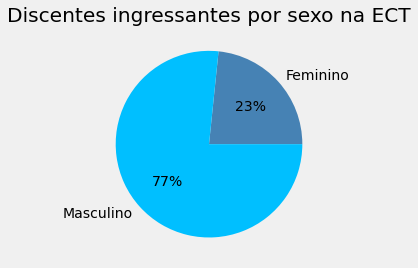

In [313]:
# declaring data
data = unidade_sexo[unidade_sexo.nome_unidade == 'ESCOLA DE CIÊNCIAS E TECNOLOGIA'][['F',"M"]].values[0]
keys = ['Feminino', 'Masculino']
# # define Seaborn color palette to use
palette_color = sns.color_palette("Blues_r")
  
# plotting data on chart
graf = plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
plt.title('Discentes ingressantes por sexo na ECT')
# displaying chart
plt.savefig('ingressantes-ect-pie', format='png')
plt.show()

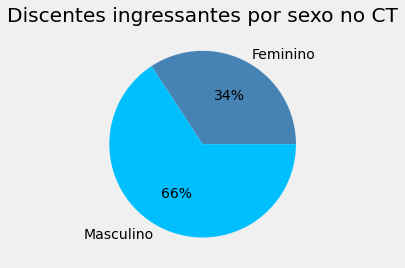

In [314]:
# declaring data
data = unidade_sexo[unidade_sexo.nome_unidade == 'CENTRO DE TECNOLOGIA'][['F',"M"]].values[0]
keys = ['Feminino', 'Masculino']
  
# # define Seaborn color palette to use
palette_color = sns.color_palette("Blues_r")
  
# plotting data on chart
plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
plt.title('Discentes ingressantes por sexo no CT')
# displaying chart
plt.savefig('ingressantes-ct-pie', format='png')
plt.show()

In [18]:
df_discentes.nome_unidade.unique()

array(['CENTRO DE TECNOLOGIA', 'ESCOLA DE CIÊNCIAS E TECNOLOGIA',
       'CENTRO DE CIÊNCIAS EXATAS E DA TERRA',
       'INSTITUTO METROPOLE DIGITAL'], dtype=object)

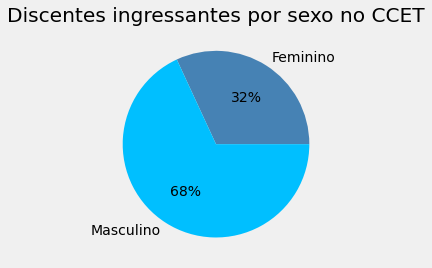

In [315]:
# declaring data
data = unidade_sexo[unidade_sexo.nome_unidade == 'CENTRO DE CIÊNCIAS EXATAS E DA TERRA'][['F',"M"]].values[0]
keys = ['Feminino', 'Masculino']
  
# # define Seaborn color palette to use
palette_color = sns.color_palette("Blues_r")
  
# plotting data on chart
plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
plt.title('Discentes ingressantes por sexo no CCET')
# displaying chart
plt.savefig('ingressantes-ccet-pie.png', format='png')
plt.show()


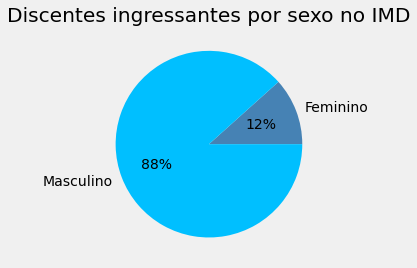

In [316]:
# declaring data
data = unidade_sexo[unidade_sexo.nome_unidade == 'INSTITUTO METROPOLE DIGITAL'][['F',"M"]].values[0]
keys = ['Feminino', 'Masculino']
  
# # define Seaborn color palette to use
palette_color = sns.color_palette("Blues_r")
  
# plotting data on chart
plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
plt.title('Discentes ingressantes por sexo no IMD')
# displaying chart
plt.savefig('ingressantes-imd-pie.png', format='png')
plt.show()

### Percentual de pessoas formadas do sexo Feminino e Masculino por setor

In [57]:
formados = df_discentes_unidade[(df_discentes_unidade.status=='CONCLUÍDO') | (df_discentes_unidade.status=='FORMADO')]
unidade_sexo_formados = pd.crosstab(formados['nome_unidade'], formados['sexo']).sort_values(by='F', ascending=False).reset_index()

In [138]:
unidade_sexo_formados

sexo,nome_unidade,F,M,false
0,CENTRO DE TECNOLOGIA,1414,2350,1
1,ESCOLA DE CIÊNCIAS E TECNOLOGIA,858,2247,3
2,CENTRO DE CIÊNCIAS EXATAS E DA TERRA,676,1224,0
3,INSTITUTO METROPOLE DIGITAL,69,376,0


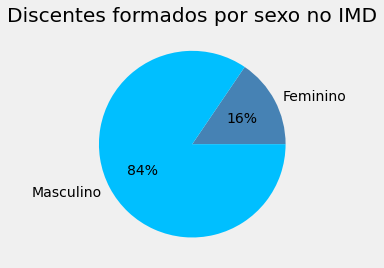

In [317]:
# declaring data
data = unidade_sexo_formados[unidade_sexo_formados.nome_unidade == 'INSTITUTO METROPOLE DIGITAL'][['F',"M"]].values[0]
keys = ['Feminino', 'Masculino']
  
# # define Seaborn color palette to use
palette_color = sns.color_palette("Blues_r")
  
# plotting data on chart
plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
plt.title('Discentes formados por sexo no IMD')
# displaying chart
plt.savefig('formados-imd-pie', format='png')
plt.show()

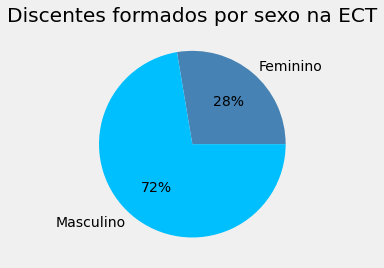

In [318]:
# declaring data
data = unidade_sexo_formados[unidade_sexo_formados.nome_unidade == 'ESCOLA DE CIÊNCIAS E TECNOLOGIA'][['F',"M"]].values[0]
keys = ['Feminino', 'Masculino']
  
# # define Seaborn color palette to use
palette_color = sns.color_palette("Blues_r")
  
# plotting data on chart
plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
plt.title('Discentes formados por sexo na ECT')
# displaying chart
plt.savefig('formados-ect-pie', format='png')
plt.show()

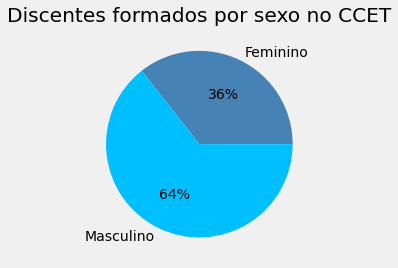

In [319]:
# declaring data
data = unidade_sexo_formados[unidade_sexo_formados.nome_unidade == 'CENTRO DE CIÊNCIAS EXATAS E DA TERRA'][['F',"M"]].values[0]
keys = ['Feminino', 'Masculino']
  
# # define Seaborn color palette to use
palette_color = sns.color_palette("Blues_r")
  
# plotting data on chart
plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
plt.title('Discentes formados por sexo no CCET')
plt.savefig('formados-ccet-pie', format='png')
# displaying chart
plt.show()

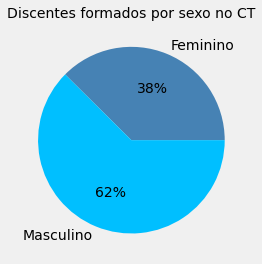

In [323]:
# declaring data
data = unidade_sexo_formados[unidade_sexo_formados.nome_unidade == 'CENTRO DE TECNOLOGIA'][['F',"M"]].values[0]
keys = ['Feminino', 'Masculino']
  
# # define Seaborn color palette to use
palette_color = sns.color_palette("Blues_r")
  
# plotting data on chart
plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
plt.title('Discentes formados por sexo no CT', fontsize=14)
plt.savefig('formados-ct-pie', format='png')
# displaying chart
plt.show()

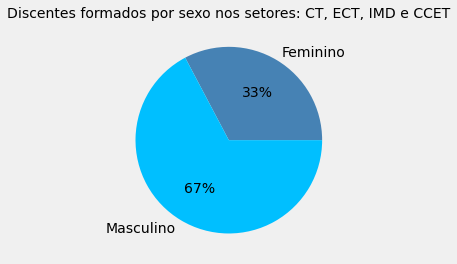

In [326]:
# declaring data
data = [unidade_sexo_formados.F.sum(), unidade_sexo_formados.M.sum()]
keys = ['Feminino', 'Masculino']
  
# # define Seaborn color palette to use
palette_color = sns.color_palette("Blues_r")
  
# plotting data on chart
plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
plt.title('Discentes formados por sexo nos setores: CT, ECT, IMD e CCET', fontsize=14)
plt.savefig('formados-exatas-pie', format='png')
# displaying chart
plt.show()

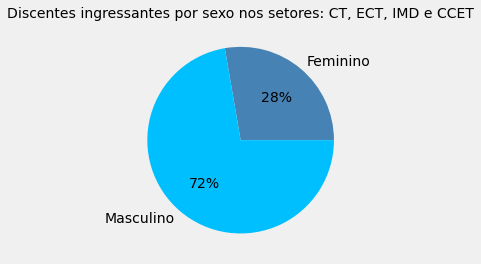

In [327]:
# declaring data
data = [unidade_sexo.F.sum(), unidade_sexo.M.sum()]
keys = ['Feminino', 'Masculino']
  
# # define Seaborn color palette to use
palette_color = sns.color_palette("Blues_r")
  
# plotting data on chart
plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
plt.title('Discentes ingressantes por sexo nos setores: CT, ECT, IMD e CCET', fontsize=14)
plt.savefig('ingressantes-exatas-pie', format='png')
# displaying chart
plt.show()

In [161]:
df_discentes[df_discentes['status']=='CONCLUÍDO'].sexo.value_counts()

M        4759
F        2001
false       4
Name: sexo, dtype: int64

In [39]:
ano_sexo = pd.crosstab(df_discentes_unidade['ano_ingresso'], df_discentes_unidade['sexo']).reset_index()

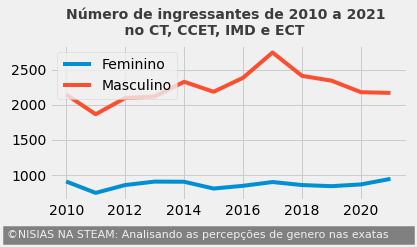

In [202]:
plt.plot(ano_sexo['ano_ingresso'], ano_sexo['F'], label='Feminino')
plt.plot(ano_sexo['ano_ingresso'], ano_sexo['M'], label = 'Masculino')
plt.legend(['Feminino', 'Masculino'], loc='upper left')
plt.text(x = 2010, y = 3000,
    s = '''Número de ingressantes de 2010 a 2021 
            no CT, CCET, IMD e ECT''',
               fontsize = 14, weight = 'bold', alpha = .75)
# plt.text(x = 0.5, y = -0.09,
#     s = '''  Discordo''',fontsize = 12, color = '#000000')
# plt.text(x = 6.5, y = -0.09,
#     s = '  Concordo',fontsize = 12, color = '#000000')
plt.text(x = 2008, y = 100, 
    s = '©NISIAS NA STEAM: Analisando as percepções de genero nas exatas      ',fontsize = 11, color = '#f0f0f0', backgroundcolor = 'grey')
plt.tight_layout()
plt.savefig('ingressantes-barra', format='png')
plt.show()

In [41]:
ano_sexo_percent = pd.DataFrame({})
for i in ano_sexo.itertuples():
    percent_f = (i.F*100)/(i.F + i.M)
    percent_m = 100 - percent_f
    ano_sexo_percent = ano_sexo_percent.append({'ano_ingresso': i.ano_ingresso, 'percent_F':percent_f, 'percent_M':percent_m}, ignore_index=True)

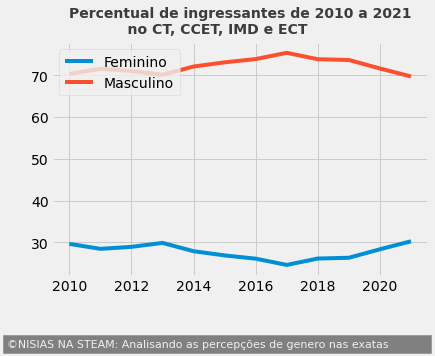

In [385]:
plt.plot(ano_sexo_percent['ano_ingresso'], ano_sexo_percent['percent_F'], label='Feminino')
plt.plot(ano_sexo_percent['ano_ingresso'], ano_sexo_percent['percent_M'], label = 'Masculino')
plt.legend(['Feminino', 'Masculino'], loc='upper left')
plt.text(x = 2010, y = 80.0,
    s = '''Percentual de ingressantes de 2010 a 2021 
            no CT, CCET, IMD e ECT''',
               fontsize = 14, weight = 'bold', alpha = .75)
# plt.text(x = 0.5, y = -0.09,
#     s = '''  Discordo''',fontsize = 12, color = '#000000')
# plt.text(x = 6.5, y = -0.09,
#     s = '  Concordo',fontsize = 12, color = '#000000')
plt.text(x = 2008, y = 5, 
    s = '©NISIAS NA STEAM: Analisando as percepções de genero nas exatas           ',fontsize = 11, color = '#f0f0f0', backgroundcolor = 'grey')
# plt.tight_layout()
# plt.savefig('ingressantes-barra', format='png')
plt.show()

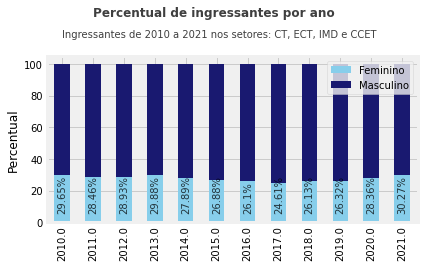

In [159]:
#create stacked bar chart
graf = ano_sexo_percent.set_index('ano_ingresso').plot(kind='bar', stacked=True, color=['#87CEEB','#191970'])
#add axis titles
plt.ylabel('Percentual',  fontsize=12)
plt.xlabel('',  fontsize=12)
plt.legend(['Feminino', 'Masculino'])
plt.text(x = 1, y = 130,
    s = """Percentual de ingressantes por ano""",
               fontsize = 12, weight = 'bold', alpha = .75)
plt.text(x = 0, y = 117,
    s = '''Ingressantes de 2010 a 2021 nos setores: CT, ECT, IMD e CCET''',
               fontsize = 10, alpha = .75)

plt.text(x = -0.15, y = 7,
    s = str(ano_sexo_percent[ano_sexo_percent.ano_ingresso==2010].percent_F.unique()[0].round(2))+'%',
               fontsize = 10, alpha = .75, rotation=90)
plt.text(x = 0.85, y = 7,
    s = str(ano_sexo_percent[ano_sexo_percent.ano_ingresso==2011].percent_F.unique()[0].round(2))+'%',
               fontsize = 10, alpha = .75, rotation=90)
plt.text(x = 1.85, y = 7,
    s = str(ano_sexo_percent[ano_sexo_percent.ano_ingresso==2012].percent_F.unique()[0].round(2))+'%',
               fontsize = 10, alpha = .75, rotation=90)
plt.text(x = 2.85, y = 7,
    s = str(ano_sexo_percent[ano_sexo_percent.ano_ingresso==2013].percent_F.unique()[0].round(2))+'%',
               fontsize = 10, alpha = .75, rotation=90)
plt.text(x = 3.85, y = 7,
    s = str(ano_sexo_percent[ano_sexo_percent.ano_ingresso==2014].percent_F.unique()[0].round(2))+'%',
               fontsize = 10, alpha = .75, rotation=90)
plt.text(x = 4.85, y = 7,
    s = str(ano_sexo_percent[ano_sexo_percent.ano_ingresso==2015].percent_F.unique()[0].round(2))+'%',
               fontsize = 10, alpha = .75, rotation=90)
plt.text(x = 5.85, y = 7,
    s = str(ano_sexo_percent[ano_sexo_percent.ano_ingresso==2016].percent_F.unique()[0].round(2))+'%',
               fontsize = 10, alpha = .75, rotation=90)
plt.text(x = 6.85, y = 7,
    s = str(ano_sexo_percent[ano_sexo_percent.ano_ingresso==2017].percent_F.unique()[0].round(2))+'%',
               fontsize = 10, alpha = .75, rotation=90)
plt.text(x = 7.85, y = 7,
    s = str(ano_sexo_percent[ano_sexo_percent.ano_ingresso==2018].percent_F.unique()[0].round(2))+'%',
               fontsize = 10, alpha = .75, rotation=90)
plt.text(x = 8.85, y = 7,
    s = str(ano_sexo_percent[ano_sexo_percent.ano_ingresso==2019].percent_F.unique()[0].round(2))+'%',
               fontsize = 10, alpha = .75, rotation=90)
plt.text(x =9.85, y = 7,
    s = str(ano_sexo_percent[ano_sexo_percent.ano_ingresso==2020].percent_F.unique()[0].round(2))+'%',
               fontsize = 10, alpha = .75, rotation=90)
plt.text(x = 10.85, y = 7,
    s = str(ano_sexo_percent[ano_sexo_percent.ano_ingresso==2021].percent_F.unique()[0].round(2))+'%',
               fontsize = 10, alpha = .75, rotation=90)
# plt.text(x = -2, y = -50,
#     s = '©NISIAS NA STEAM: Analisando as percepções de genero nas exatas                       ',fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')
#rotate x-axis labels
plt.tight_layout()
plt.savefig('ingressantes-barra-ano', format='png')

In [120]:
ano_sexo_percent[ano_sexo_percent.ano_ingresso==2010].percent_F.unique().round(2)

array([29.65])

In [349]:
ingres_2018_2021 = df_discentes_unidade[(df_discentes_unidade.ano_ingresso>2017)]
anos_2018_2021_sexo = pd.crosstab(ingres_2018_2021['nome_unidade'], ingres_2018_2021['sexo']).sort_values(by='F', ascending=False).reset_index()

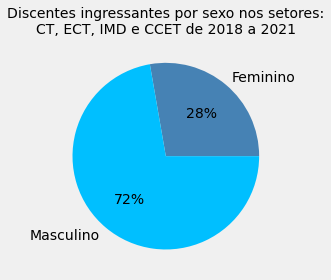

In [355]:
# declaring data
data = [anos_2018_2021_sexo.F.sum(), anos_2018_2021_sexo.M.sum()]
keys = ['Feminino', 'Masculino']
  
# # define Seaborn color palette to use
palette_color = sns.color_palette("Blues_r")
  
# plotting data on chart
plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
plt.title('''Discentes ingressantes por sexo nos setores:
CT, ECT, IMD e CCET de 2018 a 2021''', fontsize=14)
# plt.savefig('ingressantes-exatas-pie', format='png')
# displaying chart
plt.show()

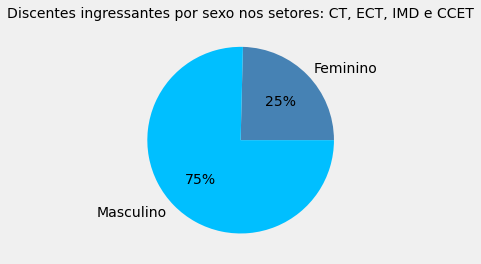

In [358]:
ingres = df_discentes_unidade[(df_discentes_unidade.ano_ingresso==2017)]
anos_sexo = pd.crosstab(ingres['nome_unidade'], ingres['sexo']).sort_values(by='F', ascending=False).reset_index()
# declaring data
data = [anos_sexo.F.sum(), anos_sexo.M.sum()]
keys = ['Feminino', 'Masculino']
  
# # define Seaborn color palette to use
palette_color = sns.color_palette("Blues_r")
  
# plotting data on chart
plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
plt.title('Discentes ingressantes por sexo nos setores: CT, ECT, IMD e CCET', fontsize=14)
# plt.savefig('ingressantes-exatas-pie', format='png')
# displaying chart
plt.show()

# Quantidade de ingressantes por curso

In [328]:
df_discentes_cursos.sexo.value_counts()

M        19783
F         6512
false        6
Name: sexo, dtype: int64

### 33,73% das mulheres q ingressaram, conluiram
### 26,4% dos homens q ingressaram, concluiram

In [204]:
curso_sexo = pd.crosstab(df_discentes_cursos['nome_curso'], df_discentes_cursos['sexo']).sort_values(by='F', ascending=False).reset_index()

In [209]:
curso_sexo_percent = pd.DataFrame({})
for i in curso_sexo.itertuples():
    percent_f = (i.F*100)/(i.F + i.M)
    percent_m = 100 - percent_f
    curso_sexo_percent = curso_sexo_percent.append({'nome_curso': i.nome_curso, 'percent_F':percent_f, 'percent_M':percent_m}, ignore_index=True)

In [214]:
curso_sexo_percent = curso_sexo_percent.sort_values(by=['percent_F','percent_M'])

In [216]:
curso_sexo_percent

,nome_curso,percent_F,percent_M
5,TECNOLOGIA DA INFORMAÇÃO,11.633493,88.366507
13,CIÊNCIA DA COMPUTAÇÃO,13.186813,86.813187
14,ENGENHARIA DE TELECOMUNICAÇÕES,13.200000,86.800000
11,ENGENHARIA DE COMPUTAÇÃO,14.716312,85.283688
8,ENGENHARIA ELÉTRICA,15.841584,84.158416
12,ENGENHARIA MECATRÔNICA,16.727273,83.272727
9,ENGENHARIA MECÂNICA,16.904501,83.095499
0,CIÊNCIAS E TECNOLOGIA,23.368376,76.631624
4,ENGENHARIA CIVIL,27.866473,72.133527
3,ENGENHARIA DE PRODUÇÃO,34.305317,65.694683


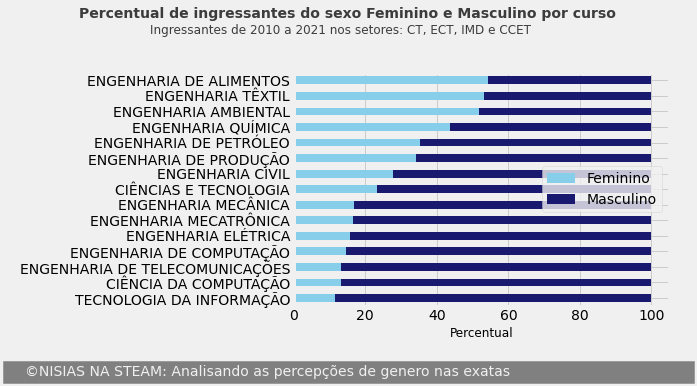

In [285]:
#create stacked bar chart
graf = curso_sexo_percent.set_index('nome_curso').plot(kind='barh', stacked=True, color=['#87CEEB','#191970'])
#add axis titles
plt.xlabel('Percentual',  fontsize=12)
plt.ylabel('',  fontsize=12)
plt.legend(['Feminino', 'Masculino'])
plt.text(x = -60, y = 18,
    s = "Percentual de ingressantes do sexo Feminino e Masculino por curso",
               fontsize = 14, weight = 'bold', alpha = .75)
plt.text(x = -40, y = 17,
    s = '''Ingressantes de 2010 a 2021 nos setores: CT, ECT, IMD e CCET''',
               fontsize = 12, alpha = .75)
plt.text(x = -80, y = -5,
    s = '    ©NISIAS NA STEAM: Analisando as percepções de genero nas exatas                                        ',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
#rotate x-axis labels

plt.savefig('ingressantes-barra-cursos', format='png')

In [289]:
formados_cursos = pd.crosstab(df_discentes_cursos[(df_discentes_cursos.status=='CONCLUÍDO') | (df_discentes_cursos.status=='FORMADO')]['nome_curso'], df_discentes_cursos[(df_discentes_cursos.status=='CONCLUÍDO') | (df_discentes_cursos.status=='FORMADO')]['sexo']).sort_values(by='F', ascending=False).reset_index()

In [291]:
curso_sexo_percent_formados = pd.DataFrame({})
for i in formados_cursos.itertuples():
    percent_f = (i.F*100)/(i.F + i.M)
    percent_m = 100 - percent_f
    curso_sexo_percent_formados = curso_sexo_percent_formados.append({'nome_curso': i.nome_curso, 'percent_F':percent_f, 'percent_M':percent_m}, ignore_index=True)

In [292]:
curso_sexo_percent_formados = curso_sexo_percent_formados.sort_values(by=['percent_F','percent_M'])

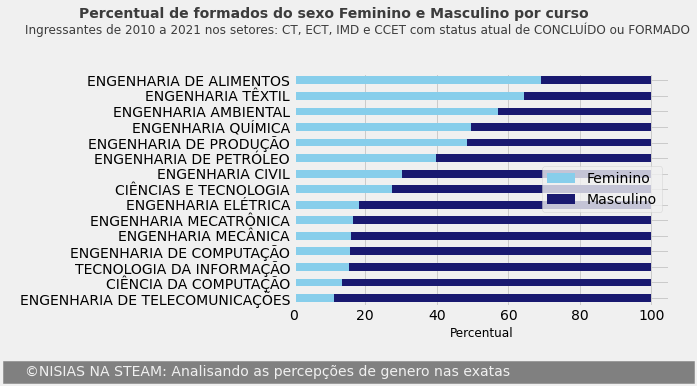

In [301]:
#create stacked bar chart
graf = curso_sexo_percent_formados.set_index('nome_curso').plot(kind='barh', stacked=True, color=['#87CEEB','#191970'])
#add axis titles
plt.xlabel('Percentual',  fontsize=12)
plt.ylabel('',  fontsize=12)
plt.legend(['Feminino', 'Masculino'])
plt.text(x = -60, y = 18,
    s = "Percentual de formados do sexo Feminino e Masculino por curso",
               fontsize = 14, weight = 'bold', alpha = .75)
plt.text(x = -75, y = 17,
    s = '''Ingressantes de 2010 a 2021 nos setores: CT, ECT, IMD e CCET com status atual de CONCLUÍDO ou FORMADO''',
               fontsize = 12, alpha = .75)
plt.text(x = -80, y = -5,
    s = '    ©NISIAS NA STEAM: Analisando as percepções de genero nas exatas                                        ',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
#rotate x-axis labels

plt.savefig('ingressantes-barra-cursos', format='png')

### Cursos Saúde

In [340]:
df_discentes_grad = df_discentes[df_discentes.nivel_ensino=='GRADUAÇÃO']

In [341]:
unidades_saude = ['CENTRO DE CIÊNCIAS DA SAÚDE', 'FACULDADE DE CIÊNCIAS DA SAÚDE DO TRAIRI - FACISA','ESCOLA DE SAÚDE', 'ESCOLA MULTICAMPI DE CIÊNCIAS MÉDICAS DO RIO GRANDE DO NORTE']
df_discentes_grad_saude = df_discentes_grad[df_discentes_grad.nome_unidade.isin(unidades_saude)]

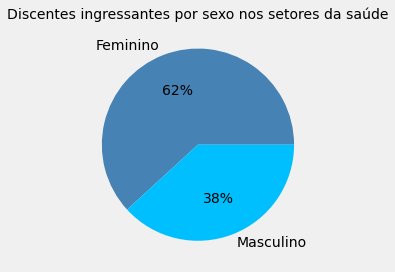

In [345]:
unidades_saude_sexo = pd.crosstab(df_discentes_grad_saude['nome_curso'], df_discentes_grad_saude['sexo']).sort_values(by='F', ascending=False).reset_index()
# declaring data
data = [unidades_saude_sexo.F.sum(), unidades_saude_sexo.M.sum()]
keys = ['Feminino', 'Masculino']
  
# # define Seaborn color palette to use
palette_color = sns.color_palette("Blues_r")
  
# plotting data on chart
plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
plt.title('Discentes ingressantes por sexo nos setores da saúde', fontsize=14)
plt.tight_layout()
plt.savefig('ingressantes-saude-pie', format='png')
# displaying chart
plt.show()

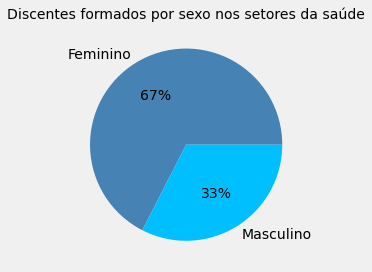

In [346]:
formados_saude = df_discentes_grad_saude[(df_discentes_grad_saude.status=='CONCLUÍDO') | (df_discentes_grad_saude.status=='FORMADO')]
unidades_saude_sexo_formados = pd.crosstab(formados_saude['nome_curso'], formados_saude['sexo']).sort_values(by='F', ascending=False).reset_index()
# declaring data
data = [unidades_saude_sexo_formados.F.sum(), unidades_saude_sexo_formados.M.sum()]
keys = ['Feminino', 'Masculino']
  
# # define Seaborn color palette to use
palette_color = sns.color_palette("Blues_r")
  
# plotting data on chart
plt.pie(data, labels=keys, colors=['#4682B4','#00BFFF'], autopct='%.0f%%')
plt.title('Discentes formados por sexo nos setores da saúde', fontsize=14)
plt.tight_layout()
plt.savefig('formados-saude-pie', format='png')
# displaying chart
plt.show()

# Dados de docentes

In [184]:
df_docentes=pd.read_csv('docentes.csv', sep=';')

In [185]:
df_docentes.lotacao.unique()

array(['NÚCLEO DE EDUCAÇÃO DA INFÂNCIA', 'ESCOLA AGRÍCOLA DE JUNDIAÍ',
       'ESCOLA DE MÚSICA', 'INSTITUTO METROPOLE DIGITAL',
       'ESCOLA DE SAÚDE', 'EDITORA UNIVERSITÁRIA',
       'PRÓ-REITORIA DE EXTENSÃO UNIVERSITÁRIA',
       'SECRETARIA DE EDUCAÇÃO A DISTÂNCIA', 'PRÓ-REITORIA DE GRADUAÇÃO',
       'CERES - DEPARTAMENTO DE HISTÓRIA', 'DEPARTAMENTO DE PEDIATRIA',
       'DEPARTAMENTO DE ENGENHARIA CIVIL E AMBIENTAL',
       'DEPARTAMENTO DE ENGENHARIA DE COMUNICACOES',
       'ESCOLA MULTICAMPI DE CIÊNCIAS MÉDICAS DO RIO GRANDE DO NORTE',
       'ESCOLA DE CIÊNCIAS E TECNOLOGIA',
       'DEPARTAMENTO DE ENGENHARIA DE COMPUTACAO E AUTOMACAO',
       'INSTITUTO DE QUÍMICA', 'DEPARTAMENTO DE GEOFÍSICA',
       'DEPARTAMENTO DE CIÊNCIAS CONTÁBEIS - DCC',
       'DEPARTAMENTO DE ENGENHARIA MECANICA',
       'DEPARTAMENTO DE FUNDAMENTOS E POLÍTICAS DA EDUCAÇÃO',
       'DEPARTAMENTO DE FARMACIA',
       'DEPARTAMENTO DE ANÁLISES CLÍNICAS E TOXICOLÓGICAS',
       'DEPARTAMENTO DE ODO

In [178]:
lotacao = ['INSTITUTO METROPOLE DIGITAL',
       'DEPARTAMENTO DE ENGENHARIA CIVIL E AMBIENTAL',
       'DEPARTAMENTO DE ENGENHARIA DE COMUNICACOES',
       'ESCOLA DE CIÊNCIAS E TECNOLOGIA',
       'DEPARTAMENTO DE ENGENHARIA DE COMPUTACAO E AUTOMACAO',
       'DEPARTAMENTO DE ENGENHARIA MECANICA',
       'DEPARTAMENTO DE COMPUTAÇÃO E TECNOLOGIA',
       'DEPARTAMENTO DE ENGENHARIA DE PETROLEO',
       'DEPARTAMENTO DE ENGENHARIA ELÉTRICA',
       'DEPARTAMENTO DE ENGENHARIA DE MATERIAIS',
       'DEPARTAMENTO DE ENGENHARIA QUIMICA',
       'DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLICADA',
       'DEPARTAMENTO DE ENGENHARIA PRODUÇÃO',
       'DEPARTAMENTO DE ENGENHARIA BIOMEDICA',
       'DEPARTAMENTO DE ENGENHARIA TÊXTIL',
       'DEPARTAMENTO DE ENGENHARIA DE ALIMENTOS']

In [179]:
id_unidades_filtro = lotacao
df_docentes = df_docentes[df_docentes.lotacao.isin(id_unidades_filtro)]

In [23]:
df_docentes[df_docentes.lotacao=='DEPARTAMENTO DE INFORMÁTICA E MATEMÁTICA APLICADA'].sexo.value_counts()

M    28
F     9
Name: sexo, dtype: int64

In [180]:
lotacao_sexo = pd.crosstab(df_docentes['lotacao'], df_docentes['sexo']).sort_values(by=['F','M'], ascending=False).reset_index()

In [181]:
lotacao_sexo_percent = pd.DataFrame({})
for i in lotacao_sexo.itertuples():
    percent_f = (i.F*100)/(i.F + i.M)
    percent_m = 100 - percent_f
    lotacao_sexo_percent = lotacao_sexo_percent.append({'lotacao': i.lotacao, 'percent_F':percent_f, 'percent_M':percent_m}, ignore_index=True)

In [182]:
lotacao_sexo_percent = lotacao_sexo_percent.sort_values(by='percent_F')

Text(-95, -5, '   ©NISIAS NA STEAM: Analisando as percepções de genero nas exatas                                                 ')

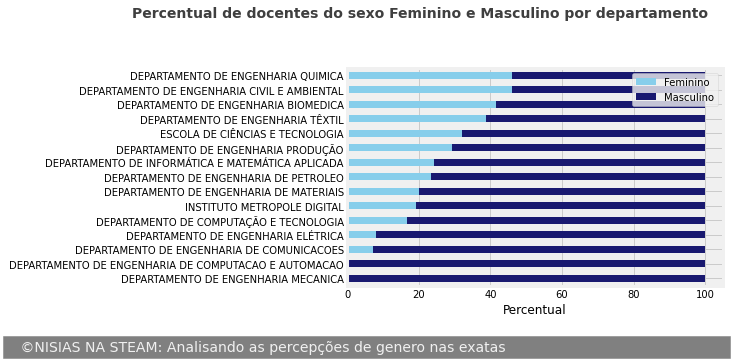

In [183]:
#create stacked bar chart
graf = lotacao_sexo_percent.set_index('lotacao').plot(kind='barh', stacked=True, color=['#87CEEB','#191970'])
#add axis titles
plt.xlabel('Percentual',  fontsize=12)
plt.ylabel('',  fontsize=12)
plt.legend(['Feminino', 'Masculino'])
plt.text(x = -60, y = 18,
    s = "Percentual de docentes do sexo Feminino e Masculino por departamento",
               fontsize = 14, weight = 'bold', alpha = .75)
plt.text(x = -95, y = -5,
    s = '   ©NISIAS NA STEAM: Analisando as percepções de genero nas exatas                                                 ',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
#rotate x-axis labels
# plt.tight_layout()
# plt.savefig('docentes-barra-depto', format='png')

In [46]:
df_docentes.columns

Index(['siape', 'nome', 'sexo', 'formacao', 'tipo_jornada_trabalho', 'vinculo',
       'categoria', 'classe_funcional', 'id_unidade_lotacao', 'lotacao',
       'admissao'],
      dtype='object')

In [104]:
#normalizando os dados
def normaliza_valores(df):
    for coluna in df.columns[1:3]:
        df[coluna] = df[coluna]/df[coluna].sum()

In [196]:
df_docentes_av = pd.read_csv('avaliacaodocencia.csv', sep=';')

In [197]:
df_docentes_av

,id_docente,nome_docente,id_turma,ano,periodo,qtd_discentes,postura_profissional_media,postura_profissional_DP,atuacao_profissional_media,atuacao_profissional_DP,autoavaliacao_aluno_media,autoavaliacao_aluno_DP
0,15370,FERNANDO MOREIRA DA SILVA,1209923,2013,2,14,9.17,1.34,8.13,2.70,7.61,2.53
1,15370,FERNANDO MOREIRA DA SILVA,1222008,2014,1,15,9.44,0.92,7.17,3.08,8.71,1.72
2,15370,FERNANDO MOREIRA DA SILVA,1222218,2014,1,38,9.19,1.67,6.77,3.29,8.12,2.53
3,15370,FERNANDO MOREIRA DA SILVA,1229520,2014,2,13,9.06,1.16,7.68,2.51,7.62,2.77
4,15370,FERNANDO MOREIRA DA SILVA,1229545,2014,2,24,9.27,1.28,8.45,1.72,8.48,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...
118153,5762088,JESSICA LIMA DE MORAIS,57675839,2021,1,7,9.97,0.17,9.59,1.06,NaN,NaN
118154,5762088,JESSICA LIMA DE MORAIS,57675840,2021,1,7,8.48,2.10,8.52,1.95,NaN,NaN
118155,5762088,JESSICA LIMA DE MORAIS,57675841,2021,1,7,8.37,2.07,8.28,2.08,NaN,NaN
118156,5762088,JESSICA LIMA DE MORAIS,57675842,2021,1,8,9.88,0.33,9.60,0.76,NaN,NaN


In [198]:
df_docentes_merge = pd.merge(df_docentes[['nome', 'sexo']], 
                             df_docentes_av[df_docentes_av['nome_docente'].isin(df_docentes.nome)],
                             left_on='nome', right_on='nome_docente')
#df_docentes[['nome', 'sexo']]
#df_docentes_av[df_docentes_av['nome_docente'].isin(df_docentes.nome)]

In [199]:
df_media_post_profis = df_docentes_merge[['nome', 'postura_profissional_media', 'atuacao_profissional_media', 'sexo']].groupby(['nome', 'sexo']).agg(lambda x: (sum(x))/len(x)).reset_index()

In [200]:
df_media_post_profis

,nome,sexo,postura_profissional_media,atuacao_profissional_media
0,ABRAHAO SANDERSON NUNES FERNANDES DA SILVA,M,8.973600,8.656800
1,ACYNELLY DAFNE DA SILVA NUNES,F,9.779000,9.680000
2,ADA CRISTINA SCUDELARI,F,8.919259,8.310000
3,ADA LIMA FERREIRA DE SOUSA,F,9.620816,9.167143
4,ADAILDO GOMES D ASSUNCAO,M,9.086765,9.013824
...,...,...,...,...
2423,ZORAIDE SOUZA PESSOA,F,8.799000,8.569333
2424,ZORANO SERGIO DE SOUZA,M,9.320217,8.553696
2425,ZULEIDE MARIA CARVALHO LIMA,F,8.994348,8.770000
2426,ZULMARA VIRGINIA DE CARVALHO,F,9.325581,9.064651


In [202]:
df_media_post_profis_atua = df_media_post_profis[['postura_profissional_media', 'atuacao_profissional_media', 'sexo']].groupby('sexo').agg(lambda x: (sum(x))/len(x)).reset_index()

In [203]:
df_media_post_profis_atua

,sexo,postura_profissional_media,atuacao_profissional_media
0,F,9.434406,9.132940
1,M,9.304327,8.966405


In [81]:
normaliza_valores(df_media_post_profis)

In [84]:
df_media_post_profis_atua

,sexo,postura_profissional_media,atuacao_profissional_media
0,F,0.002276,0.002286
1,M,0.002265,0.002262


pegar quantidade de bolsistas
pegar quantidade de homens e mulheres q vao pra pos graduação
pegar quantidade de homens e mulheres nos cursos da saúde
o tempo de atuação implica em se sentir mais confortavel p expressar ideias?